<footer id="footer"></footer>

<h1 align='center'>Sentence Sentiment Classification. BERT</h1>
<p align="center"><img src="https://drive.google.com/uc?id=1yPEFyJ6POckTW7XgLgr1YBb7MCWL1ytd"  border="0" width="800"></a></p>



<b> **Baseline** подготовлен [Deep learning school](https://www.dlschool.org/pro-track) // [семинар](https://drive.google.com/file/d/1w_rTEWXQ_SA4YPXFjpkM0aU51bDgWLyI/view?usp=sharing).



_____

## Motivation

Our goal is to create a model that takes a sentence (just like the ones in our dataset) and produces either 1 (indicating the sentence carries a positive sentiment) or a 0 (indicating the sentence carries a negative sentiment). We can think of it as looking like this:


____

<font size="2">

Наша цель — создать модель, которая берет предложение (точно такое же, как в нашем наборе данных) и выдает либо 1 (указывает на то, что предложение несет в себе положительное настроение), либо 0 (указывает на то, что предложение несет в себе отрицательное настроение). Мы можем думать об этом так:</font>

<img src="https://jalammar.github.io/images/distilBERT/sentiment-classifier-1.png" />

Under the hood, the model is actually made up of two model.

* DistilBERT processes the sentence and passes along some information it extracted from it on to the next model. DistilBERT is a smaller version of BERT developed and open sourced by the team at HuggingFace. It’s a lighter and faster version of BERT that roughly matches its performance.
* The next model, a basic Logistic Regression model from scikit learn will take in the result of DistilBERT’s processing, and classify the sentence as either positive or negative (1 or 0, respectively).

The data we pass between the two models is a vector of size 768. We can think of this of vector as an embedding for the sentence that we can use for classification.
___
<font size="2">Под капотом модель фактически состоит из двух моделей.
* DistilBERT обрабатывает предложение и передает некоторую информацию, извлеченную из него, следующей модели. DistilBERT — это уменьшенная версия BERT, разработанная командой HuggingFace с открытым исходным кодом. Это более легкая и быстрая версия BERT, которая примерно соответствует его производительности.
* Следующая модель, базовая модель логистической регрессии от scikit Learn, будет принимать результат обработки DistilBERT и классифицировать предложение как положительное или отрицательное (1 или 0 соответственно).
Данные, которые мы передаем между двумя моделями, представляют собой вектор размером 768. Мы можем рассматривать этот вектор как вложение предложения, которое мы можем использовать для классификации.</font>

<img src="https://jalammar.github.io/images/distilBERT/distilbert-bert-sentiment-classifier.png" />

## Dataset
The dataset we will use in this example is [SST2](https://nlp.stanford.edu/sentiment/index.html), which contains sentences from movie reviews, each labeled as either positive (has the value 1) or negative (has the value 0):

___

<font size="2">В этом примере мы будем использовать набор данных [SST2](https://nlp.stanford.edu/sentiment/index.html), который содержит предложения из обзоров фильмов, каждое из которых помечено как положительное (имеет значение 1) или отрицательное. (имеет значение 0):</font>

<table class="features-table">
  <tr>
    <th class="mdc-text-light-green-600">
    sentence
    </th>
    <th class="mdc-text-purple-600">
    label
    </th>
  </tr>
  <tr>
    <td class="mdc-bg-light-green-50" style="text-align:left">
      a stirring , funny and finally transporting re imagining of beauty and the beast and 1930s horror films
    </td>
    <td class="mdc-bg-purple-50">
      1
    </td>
  </tr>
  <tr>
    <td class="mdc-bg-light-green-50" style="text-align:left">
      apparently reassembled from the cutting room floor of any given daytime soap
    </td>
    <td class="mdc-bg-purple-50">
      0
    </td>
  </tr>
  <tr>
    <td class="mdc-bg-light-green-50" style="text-align:left">
      they presume their audience won't sit still for a sociology lesson
    </td>
    <td class="mdc-bg-purple-50">
      0
    </td>
  </tr>
  <tr>
    <td class="mdc-bg-light-green-50" style="text-align:left">
      this is a visually stunning rumination on love , memory , history and the war between art and commerce
    </td>
    <td class="mdc-bg-purple-50">
      1
    </td>
  </tr>
  <tr>
    <td class="mdc-bg-light-green-50" style="text-align:left">
      jonathan parker 's bartleby should have been the be all end all of the modern office anomie films
    </td>
    <td class="mdc-bg-purple-50">
      1
    </td>
  </tr>
</table>









<div style="float:left;margin:0 10px 10px 0" markdown="1">
    <a href="#footer"><img src='https://img.shields.io/badge/Наверх/Up-&#x21A9-blue'></a>
</div>

___


In [ ]:
!pip install -q transformers

     |████████████████████████████████| 4.2 MB 5.3 MB/s 
     |████████████████████████████████| 84 kB 3.5 MB/s 
     |████████████████████████████████| 596 kB 67.3 MB/s 
     |████████████████████████████████| 6.6 MB 53.6 MB/s 


<font size="2">Reference: [Transformers library](https://huggingface.co/transformers/)</font>

In [ ]:
import time
import math
import random
import torch
from torch import nn
import torch.optim as optim
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
import transformers as ppb
from tqdm.notebook import tqdm
from transformers import (AutoTokenizer, 
                          AutoModelForSequenceClassification,
                          get_linear_schedule_with_warmup
)

from torch.utils.data import (DataLoader, 
                              Sampler, 
                              Dataset, 
                              random_split
                              )
from termcolor import colored

import warnings
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import clear_output
matplotlib.rcParams.update({'figure.figsize': (16, 12), 'font.size': 14})

warnings.filterwarnings("ignore")
plt.style.use('dark_background')

SEED = 42

random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
torch.cuda.manual_seed(SEED)
torch.backends.cudnn.deterministic = True

%matplotlib inline

<div style="float:left;margin:0 10px 10px 0" markdown="1">
    <a href="#footer"><img src='https://img.shields.io/badge/Наверх/Up-&#x21A9-blue'></a>
</div>

___



### Importing the dataset // Загрузка данных

In [ ]:
df = pd.read_csv(
    'https://github.com/clairett/pytorch-sentiment-classification/raw/master/data/SST2/train.tsv',
    delimiter='\t',
    header=None
)
print(df.shape)
df.head()

(6920, 2)


,0,1
0,"a stirring , funny and finally transporting re...",1
1,apparently reassembled from the cutting room f...,0
2,they presume their audience wo n't sit still f...,0
3,this is a visually stunning rumination on love...,1
4,jonathan parker 's bartleby should have been t...,1


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Device для текущего ядра - {device}")

Device для текущего ядра - cuda


<div style="float:left;margin:0 10px 10px 0" markdown="1">
    <a href="#footer"><img src='https://img.shields.io/badge/Наверх/Up-&#x21A9-blue'></a>
</div>

___


### Using BERT for text classification // BERT для классификации текста

Let's now load a pre-trained BERT model. 
___
<font size="2">Загрузим предобученную модель BERT</font>

In [ ]:
# For DistilBERT, Load pretrained model/tokenizer:

model_class, tokenizer_class, pretrained_weights = (ppb.DistilBertModel, 
                                                    ppb.DistilBertTokenizer, 
                                                    'distilbert-base-uncased'
                                                    )
tokenizer = tokenizer_class.from_pretrained(pretrained_weights)
model = model_class.from_pretrained(pretrained_weights)

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_layer_norm.weight', 'vocab_projector.weight', 'vocab_layer_norm.bias', 'vocab_projector.bias', 'vocab_transform.bias', 'vocab_transform.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
# look at the model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)
model.eval()

DistilBertModel(
  (embeddings): Embeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (transformer): Transformer(
    (layer): ModuleList(
      (0): TransformerBlock(
        (attention): MultiHeadSelfAttention(
          (dropout): Dropout(p=0.1, inplace=False)
          (q_lin): Linear(in_features=768, out_features=768, bias=True)
          (k_lin): Linear(in_features=768, out_features=768, bias=True)
          (v_lin): Linear(in_features=768, out_features=768, bias=True)
          (out_lin): Linear(in_features=768, out_features=768, bias=True)
        )
        (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
        (ffn): FFN(
          (dropout): Dropout(p=0.1, inplace=False)
          (lin1): Linear(in_features=768, out_features=3072, bias=True)
          (lin2): Linear(i

In [ ]:
colors = ['red', 'green', 'blue', 'yellow']

def model_structure(layer, margin=0, item_color=0):
    for name, next_layer in layer.named_children():

        next = (0 if not list(next_layer.named_children()) else 1)
        print(colored(' ' * margin + name, colors[item_color]) + ':' * next)
        model_structure(next_layer, margin + len(name) + 2, (item_color + 1) % 4)

model_structure(model)

embeddings:
            word_embeddings
            position_embeddings
            LayerNorm
            dropout
transformer:
             layer:
                    0:
                       attention:
                                  dropout
                                  q_lin
                                  k_lin
                                  v_lin
                                  out_lin
                       sa_layer_norm
                       ffn:
                            dropout
                            lin1
                            lin2
                            activation
                       output_layer_norm
                    1:
                       attention:
                                  dropout
                                  q_lin
                                  k_lin
                                  v_lin
                                  out_lin
                       sa_layer_norm
                       ffn:
                   

<div style="float:left;margin:0 10px 10px 0" markdown="1">
    <a href="#footer"><img src='https://img.shields.io/badge/Наверх/Up-&#x21A9-blue'></a>
</div>

___


### Preparing the dataset // Подготовка данных

In [ ]:
df.head()

,0,1
0,"a stirring , funny and finally transporting re...",1
1,apparently reassembled from the cutting room f...,0
2,they presume their audience wo n't sit still f...,0
3,this is a visually stunning rumination on love...,1
4,jonathan parker 's bartleby should have been t...,1


In [ ]:
class ReviewsDataset(Dataset):
    def __init__(self, reviews, tokenizer, labels):
        self.labels = labels
        # tokenized reviews
        self.tokenized = [self.tokenize(rev) for rev in reviews]
        
    def __getitem__(self, idx):
        return {"tokenized": self.tokenized[idx], "label": self.labels[idx]}


    def tokenize(self, rev):
        return tokenizer.encode( rev,
                  add_special_tokens = True,
                  return_attention_mask = True,
                  return_tensors = 'pt',
                  truncation = True)

    def __len__(self):
        return len(self.labels)

dataset = ReviewsDataset(df[0], tokenizer, df[1].values.flatten())

# DON'T CHANGE, PLEASE
train_size, val_size = int(.8 * len(dataset)), int(.1 * len(dataset))
torch.manual_seed(2) 
train_data, valid_data, test_data = random_split(dataset, [train_size, val_size, len(dataset) - train_size - val_size])

print(f"Number of training examples: {len(train_data)}")
print(f"Number of validation examples: {len(valid_data)}")
print(f"Number of testing examples: {len(test_data)}")

Number of training examples: 5536
Number of validation examples: 692
Number of testing examples: 692


In [ ]:
class ReviewsSampler(Sampler):
    def __init__(self, subset, batch_size=32):
        self.batch_size = batch_size
        self.subset = subset
        self.indices = subset.indices

        # tokenized for our data
        self.tokenized = np.array(subset.dataset.tokenized)[self.indices]

    def __iter__(self):

        batch_idx = []
        # index in sorted data
        for index in np.argsort(list(map(len, self.tokenized))):
            batch_idx.append(index)
            if len(batch_idx) == self.batch_size:
                yield batch_idx
                batch_idx = []

        if len(batch_idx) > 0:
            yield batch_idx

    def __len__(self):
        return len(self.subset)

In [ ]:
def get_padded(values):
    max_len = 0
    for value in values:
        if value.shape[1] > max_len:
            max_len = value.shape[1]

    padded = np.array([np.asarray(value.squeeze(0).tolist() + \
                                  [0]*(max_len-len(value.squeeze(0).tolist()))) for value in values])

    return padded

def collate_fn(batch):

    inputs = []
    labels = []
    for elem in batch:
        inputs.append(elem['tokenized'])
        labels.append(elem['label'])
    
    inputs = get_padded(inputs) # padded inputs
    attention_mask = np.where(inputs != 0, 1, 0)


    return {"inputs": torch.from_numpy(np.array(inputs)), "labels": torch.FloatTensor(labels), 'attention_mask' : torch.tensor(attention_mask)}

train_loader = DataLoader(train_data, batch_sampler=ReviewsSampler(train_data), collate_fn=collate_fn)
valid_loader = DataLoader(valid_data, batch_sampler=ReviewsSampler(valid_data), collate_fn=collate_fn)
test_loader = DataLoader(test_data, batch_sampler=ReviewsSampler(test_data), collate_fn=collate_fn)

<div style="float:left;margin:0 10px 10px 0" markdown="1">
    <a href="#footer"><img src='https://img.shields.io/badge/Наверх/Up-&#x21A9-blue'></a>
</div>

___


### Baseline

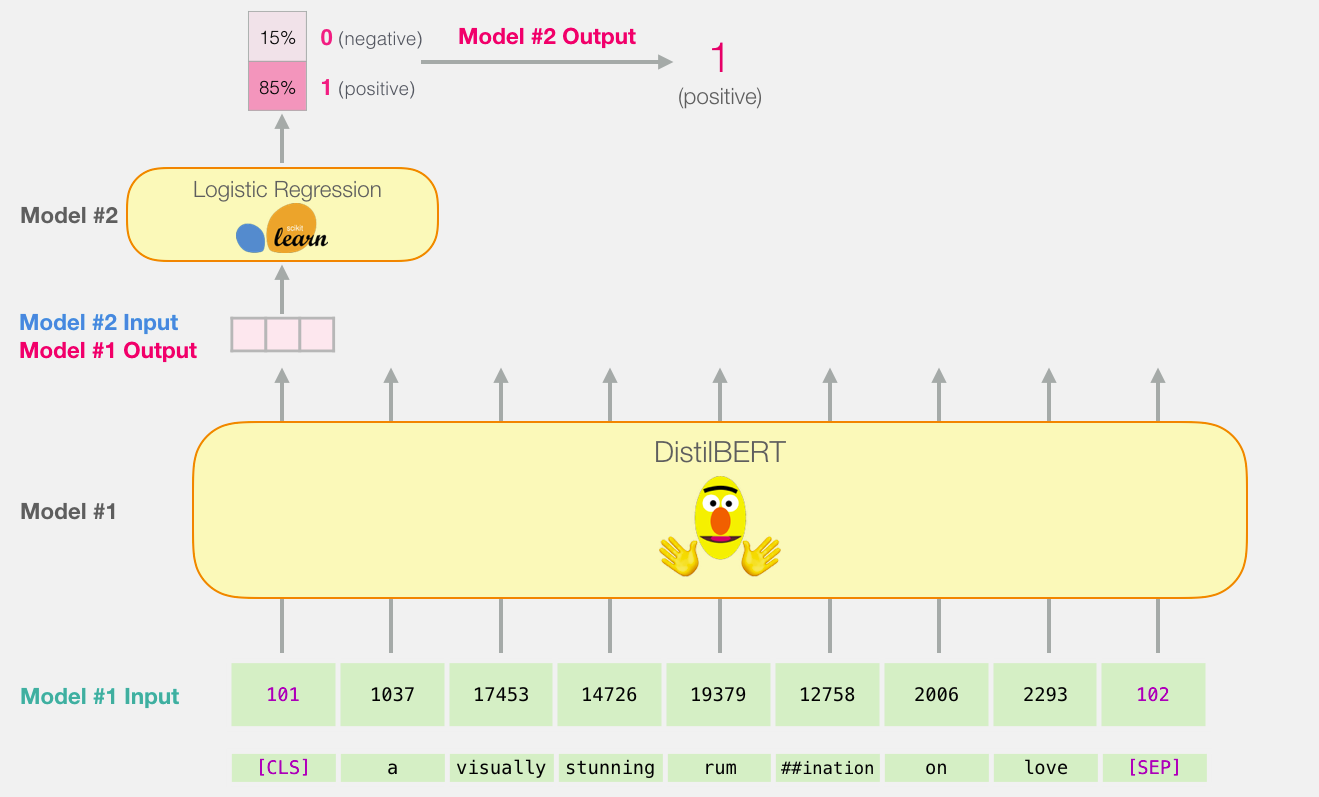

In [ ]:
def get_xy(loader, model):
    features = []
    labels = []
    
    with torch.no_grad():
        
        for batch in loader:
            
            inputs = batch["inputs"].to(device)
            mask = batch["attention_mask"].to(device)
            last_hidden_states = model(input_ids=inputs, attention_mask=mask)
            features.append(last_hidden_states[0].cpu())
            labels.append(batch["labels"])

    features = torch.cat([elem[:, 0, :] for elem in features], dim=0).numpy()
    labels = torch.cat(labels, dim=0).numpy()
    
    return features, labels

In [ ]:
%%time

train_features, train_labels = get_xy(train_loader, model)
valid_features, valid_labels = get_xy(valid_loader, model)
test_features, test_labels = get_xy(test_loader, model)

CPU times: user 8.84 s, sys: 289 ms, total: 9.13 s
Wall time: 9.16 s


In [ ]:
lr_clf = LogisticRegression()
lr_clf.fit(train_features, train_labels)
score = lr_clf.score(test_features, test_labels)

print(f"Accuracy is {score:.2%}")

Accuracy is 81.79%


<div style="float:left;margin:0 10px 10px 0" markdown="1">
    <a href="#footer"><img src='https://img.shields.io/badge/Наверх/Up-&#x21A9-blue'></a>
</div>

___


### Fine-Tuning BERT

Define the model

___
<font size="2">Определим модель</font>

In [ ]:
class BertClassifier(nn.Module):
    def __init__(self, pretrained_model, dropout=0.2):
        super().__init__()

        self.bert = pretrained_model
        out = self.bert.transformer.layer[-1].output_layer_norm.normalized_shape[0]
        self.dropout = nn.Dropout(p=dropout)
        self.relu = nn.ReLU()
        self.pre_classifier = nn.Linear(out, out) 
        self.classifier = nn.Linear(out, 1)
        self.sigmoid = nn.Sigmoid()
    
    def forward(self, inputs, attention_mask):
        outputs = self.bert(input_ids=inputs, attention_mask=attention_mask)
        last_hidden_state = outputs[0]
        pooled_output = self.dropout(last_hidden_state[:, 0])
        x = self.relu(self.pre_classifier(pooled_output))
        # proba = [batch_size, ] - probability to be positive
        proba = self.classifier(x).squeeze(1)
        classes = self.sigmoid(proba)

        return classes

In [ ]:
# DON'T CHANGE
model = model_class.from_pretrained(pretrained_weights).to(device)
bert_clf = BertClassifier(model).to(device)
# you can change
optimizer = torch.optim.AdamW(bert_clf.parameters(), lr=2e-5, weight_decay=0.005)
criterion = nn.BCELoss()

In [ ]:
def train(model, iterator, optimizer, criterion, clip, train_history=None, valid_history=None):
    model.train()
    epoch_loss = 0
    processed = 0
    history = []

    for i, batch in enumerate(iterator):
        optimizer.zero_grad()

        input_ids = batch['inputs'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        targets = batch["labels"].to(device) 
        outputs = model(input_ids, attention_mask)

        loss = criterion(outputs, targets) 
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), clip)
        optimizer.step()
        epoch_loss += loss.item() * input_ids.size(0)
        processed += input_ids.size(0)
        history.append(loss.cpu().data.numpy())
        
        if (i+1)%10==0:
            fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 8))

            clear_output(True)
            ax[0].plot(history, label='train loss')
            ax[0].set_xlabel('Batch')
            ax[0].set_title('Train loss')
            if train_history is not None:
                ax[1].plot(train_history, label='general train history')
                ax[1].set_xlabel('Epoch')
            if valid_history is not None:
                ax[1].plot(valid_history, label='general valid history')
            plt.legend()
            
            plt.show()

        
    return epoch_loss / processed


def evaluate(model, iterator, criterion):

    model.eval()
    epoch_loss = 0
    processed = 0
    history = []
    
    with torch.no_grad():
    
        for i, batch in enumerate(iterator):

            input_ids = batch['inputs'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            targets = batch["labels"].to(device) 
            outputs = model(input_ids, attention_mask)
            loss = criterion(outputs, targets)
            epoch_loss += loss.item() * input_ids.size(0)
            processed += input_ids.size(0)
        
    return epoch_loss / processed

def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs

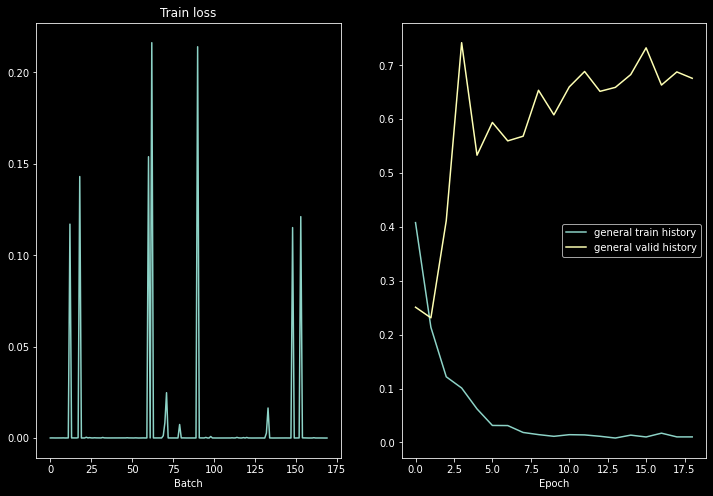

Epoch: 20 | Time: 0m 30s
	Train Loss: 0.007 | Train PPL:   1.007
	 Val. Loss: 0.715 |  Val. PPL:   2.044


In [ ]:
plt.style.use('dark_background')
train_history = []
valid_history = []

N_EPOCHS = 20
CLIP = 1
total_steps = len(train_loader) * N_EPOCHS
lr_scheduler = get_linear_schedule_with_warmup(optimizer, 
                                        num_warmup_steps = 0,
                                        num_training_steps = total_steps)
best_valid_loss = float('inf')

for epoch in tqdm(range(N_EPOCHS)):
    
    start_time = time.time()
    
    train_loss = train(bert_clf, train_loader, optimizer, criterion,  
                       CLIP, train_history, valid_history)
    valid_loss = evaluate(bert_clf, valid_loader, criterion)
    lr_scheduler.step()
    end_time = time.time()
    
    epoch_mins, epoch_secs = epoch_time(start_time, end_time)
    
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(bert_clf.state_dict(), 'best-val-model.pt')
    
    train_history.append(train_loss)
    valid_history.append(valid_loss)
    print(f'Epoch: {epoch+1:02} | Time: {epoch_mins}m {epoch_secs}s')
    print(f'\tTrain Loss: {train_loss:.3f} | Train PPL: {math.exp(train_loss):7.3f}')
    print(f'\t Val. Loss: {valid_loss:.3f} |  Val. PPL: {math.exp(valid_loss):7.3f}')

In [ ]:
best_model = BertClassifier(model).to(device)
best_model.load_state_dict(torch.load('best-val-model.pt'))

pred_labels = []
true_labels = []

best_model.eval()
with torch.no_grad():
    for i, batch in tqdm(enumerate(test_loader)):
        inputs = batch["inputs"].to(device)
        mask = batch["attention_mask"].to(device)
        labels = batch["labels"]
        true_labels.append(labels.numpy())
        preds = best_model(inputs, mask).cpu().numpy()
        pred_labels.append((preds > 0.5) * 1.)

0it [00:00, ?it/s]

In [ ]:
true_labels = np.concatenate(true_labels, axis=0)
pred_labels = np.concatenate(pred_labels, axis=0)

score = accuracy_score(true_labels, pred_labels)
print(f"Accuracy is {score:.2%}")
assert accuracy_score(true_labels, pred_labels) >= 0.86

Accuracy is 87.72%


<div style="float:left;margin:0 10px 10px 0" markdown="1">
    <a href="#footer"><img src='https://img.shields.io/badge/Наверх/Up-&#x21A9-blue'></a>
</div>

___


### Finetuned model from **HUGGING FACE**

<font size="2"> Reference: [BertForSequenceClassification](https://huggingface.co/transformers/model_doc/bert.html?highlight=bertfor#transformers.BertForSequenceClassification)</font>

In [ ]:
# we have the same tokenizer
# new_tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased-finetuned-sst-2-english")
new_model = AutoModelForSequenceClassification.from_pretrained("distilbert-base-uncased-finetuned-sst-2-english").to(device)

Downloading:   0%|          | 0.00/629 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/255M [00:00<?, ?B/s]

In [ ]:
pred_labels = []
true_labels = []

new_model.eval()
with torch.no_grad():
    for i, batch in tqdm(enumerate(test_loader)):
        inputs = batch["inputs"].to(device)
        mask = batch["attention_mask"].to(device)
        labels = batch["labels"]
        true_labels.append(labels.numpy())
        logits = new_model(inputs, mask).logits.cpu().numpy()
        preds = logits.argmax(1)
        pred_labels.append(preds)

true_labels = np.concatenate(true_labels, axis=0)
pred_labels = np.concatenate(pred_labels, axis=0)

score = accuracy_score(true_labels, pred_labels)


print(f"Accuracy is {score:.2%}")
assert accuracy_score(true_labels, pred_labels) >= 0.86

0it [00:00, ?it/s]

Accuracy is 98.41%


In [ ]:
model_structure(new_model)

distilbert:
            embeddings:
                        word_embeddings
                        position_embeddings
                        LayerNorm
                        dropout
            transformer:
                         layer:
                                0:
                                   attention:
                                              dropout
                                              q_lin
                                              k_lin
                                              v_lin
                                              out_lin
                                   sa_layer_norm
                                   ffn:
                                        dropout
                                        lin1
                                        lin2
                                        activation
                                   output_layer_norm
                                1:
                                   attention:


<div style="float:left;margin:0 10px 10px 0" markdown="1">
    <a href="#footer"><img src='https://img.shields.io/badge/Наверх/Up-&#x21A9-blue'></a>
</div>

___


## Выводы 





Мы преследовали цель модель, которая берет предложение (точно такое же, как в нашем наборе данных) и выдает либо 1 (указывает на то, что предложение несет в себе положительное настроение), либо 0 (указывает на то, что предложение несет в себе отрицательное настроение) - то есть построить классификатор тональности текста  

Для данных целей было определено три подхода:

1. BERT для классификации текста - мы извлекали эмбеддинги из предобученной модели и подавали их как признаки в модель Логистической регрессии. Данный подход достаточно быстро позволил достигнуть результата `81.79 Accuracy`

2. Fine-tuning Bert. Мы взяли предобученную модель и добавили на выход слои для получения скоров и в последствии - классов. 

```python

Структура модели:

class BertClassifier(nn.Module):
    def __init__(self, pretrained_model, dropout=0.2):
        super().__init__()

        self.bert = pretrained_model
        out = self.bert.transformer.layer[-1].output_layer_norm.normalized_shape[0]
        self.dropout = nn.Dropout(p=dropout)
        self.relu = nn.ReLU()
        self.pre_classifier = nn.Linear(out, out) 
        self.classifier = nn.Linear(out, 1)
        self.sigmoid = nn.Sigmoid()
    
    def forward(self, inputs, attention_mask):
        outputs = self.bert(input_ids=inputs, attention_mask=attention_mask)
        last_hidden_state = outputs[0]
        pooled_output = self.dropout(last_hidden_state[:, 0])
        x = self.relu(self.pre_classifier(pooled_output))
        # proba = [batch_size, ] - probability to be positive
        proba = self.classifier(x).squeeze(1)
        classes = self.sigmoid(proba)

        return classes



optimizer = torch.optim.AdamW(bert_clf.parameters(), lr=2e-5, weight_decay=0.005)
criterion = nn.BCELoss()
N_EPOCHS = 20
CLIP = 1
total_steps = len(train_loader) * N_EPOCHS
lr_scheduler = get_linear_schedule_with_warmup(optimizer, 
                                        num_warmup_steps = 0,
                                        num_training_steps = total_step)

```
Данный подход, позволил достичь результатов `87.72 Accuracy`

3. Мы взяли готовую модель, предобученную на нашу задачу. Это позволило достигнуть результата `98.41 Accuracy`


Таким образом, лушиие результаты достигаются путем обучения трансформера под задачу и пул данных, с которым требуется работа. Но для такого обучения, как было продемонстрированно на предобученной модели - требуется значительные затраты ресурсов (`GPU`, необходимо значительнно количество качественных данных, время обучения)

<div style="float:left;margin:0 10px 10px 0" markdown="1">
    <a href="#footer"><img src='https://img.shields.io/badge/Наверх/Up-&#x21A9-blue'></a>
</div>

___
